In [24]:
#Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import networkx as nx
from numpy import genfromtxt
import math
import matplotlib.image as mpimg

In [74]:
# Read in the stochastic adjacency matrices
kl = sorted(os.listdir("/Volumes/HardDrive/New_Workflow/stochastic_58/"))
stoc = []
for item in kl:
    if '._' not in item:
        stoc.append(item)
        
d = {}
for i in range(len(stoc)):
    d[str(i)] = pd.read_csv("/Volumes/HardDrive/New_Workflow/stochastic_58/"+stoc[i], header = None)

In [75]:
waloc = pd.read_csv('/Users/Yuval/Desktop/Thesis/all-wa-pos.csv')#use this for all 297 towns
waloc = waloc.loc[waloc['Population'] >0]
# When doing big towns
waloc = waloc[:58]
# When ignoring sattelite towns
# waloc = waloc.loc[(waloc['City / Town'] != 'Yanchep') & (waloc['City / Town'] != 'Bullsbrook') &
#                   (waloc['City / Town'] != 'Mundijong') & (waloc['City / Town'] != 'Serpentine') &
#                  (waloc['City / Town'] != 'Two Rocks') ]
# waloc = waloc.reset_index()
# waloc = waloc.drop(columns = ['index'])

# When also ignoring rural sattelite towns
# waloc = waloc.loc[(waloc['City / Town'] != 'Pinjarra') & (waloc['City / Town'] != 'Drummond Cove') &
#                   (waloc['City / Town'] != 'Bridgetown') & (waloc['City / Town'] != 'Binningup') &
#                  (waloc['City / Town'] != 'Dampier') ]
# waloc = waloc.reset_index()
# waloc = waloc.drop(columns = ['index'])

In [76]:
C = 9*10**9

In [77]:
# Read in the network, generate a plot for it

bets = []
for week in range(len(d)):
    my_data = d[str(week)].to_numpy()
    my_data = my_data.tolist()

    for i in range(len(my_data)):
        for j in range(len(my_data[0])):
            if my_data[i][j] * C < 0.5:
                my_data[i][j] = 0

    my_data = np.array(my_data)
    A = nx.from_numpy_matrix(my_data)
    A = nx.DiGraph(A)

    # Assign labels to each town based on waloc
    towns = list(waloc['City / Town'])
    labeldict = {}
    for node in list(A.nodes()):
        labeldict[node] = towns[node]
    
    bet = nx.betweenness_centrality(A)
    
    bets.append(bet.values())

In [78]:
bet_towns = list(zip(*bets))

mean_bet = {}
for b in range(len(bet_towns)):
    mean_bet[b] = np.mean(bet_towns[b])

In [79]:
sats = ['Dampier','Pinjarra','Drummond Cove', 'Bridgetown', 'Binningup','Yanchep', 'Bullsbrook','Mundijong',
       'Serpentine','Two Rocks']

x = mean_bet
mean_bet = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse = True)}
for m in mean_bet:
    if labeldict[m] in sats:
        print(colored(labeldict[m],attrs=['bold']),mean_bet[m])
    else:
        print(labeldict[m], mean_bet[m])

Perth 0.07329090076447468
Mundijong 0.04333177648278705
Bullsbrook 0.034050936938345946
Serpentine 0.030544322363037443
Bunbury 0.03000715418547018
Mandurah 0.029431952809446348
Yanchep 0.027456216410701888
Manjimup 0.022048046086968365
Pinjarra 0.020405511704238544
Bridgetown 0.019043791755896062
Albany 0.01666019156846242
Narrogin 0.012802423569150786
Denmark 0.012485663697694611
Busselton 0.01245068438851888
Geraldton 0.009750239547502532
Donnybrook 0.008744180341341038
Little Grove 0.00783543783474122
Newman 0.007788565111476365
Drummond Cove 0.007274137430066832
Kalgoorlie-Boulder 0.006370407329375964
Binningup 0.005725859970279302
Kojonup 0.005614489725751098
Dunsborough 0.004966514518955456
Capel 0.004397691159968655
Northam 0.0038729402019936285
Merredin 0.00355374503187734
York 0.0034873748111535177
Dampier 0.0032931103688343703
Mount Barker 0.0028950621930781606
Katanning 0.0025640654034391305
Cowaramup 0.00223363960539987
Collie 0.0022152799222828656
Two Rocks 0.002173339429

In [17]:
weight = dict(A.degree(weight='weight'))

# Get a dictionary of locations (helpful for plotting)
locs = {}
for node in list(A.nodes()):
    locs[node] = np.array([float(waloc.iloc[node,2]),float(waloc.iloc[node,3])])

In [20]:
# Get the edge widths based on the weight (use a log scale)
weights = nx.get_edge_attributes(A, 'weight')
logs = [math.log(item) for item in list(weights.values())]
minn = min(logs)
maxx = max(logs)
widths = [(item + 16) for item in logs]
for i in range(len(widths)):
    if widths[i] <-5:
        widths[i] = 0
    elif (widths[i] >= -5) & (widths[i] <=0.2):
        widths[i] = 0.2

In [22]:
#Better for filtered, stochasticised data
minn = 1
for m in weight.values():
    if m <minn and m >0:
        minn = m

ws = []
for i in weight.values():
    try:
        ws.append(40*math.log(1/100*1/minn*i))
    except:
        ws.append(0)
        
for i in range(len(ws)):
    if ws[i]<10:
        ws[i] = 10

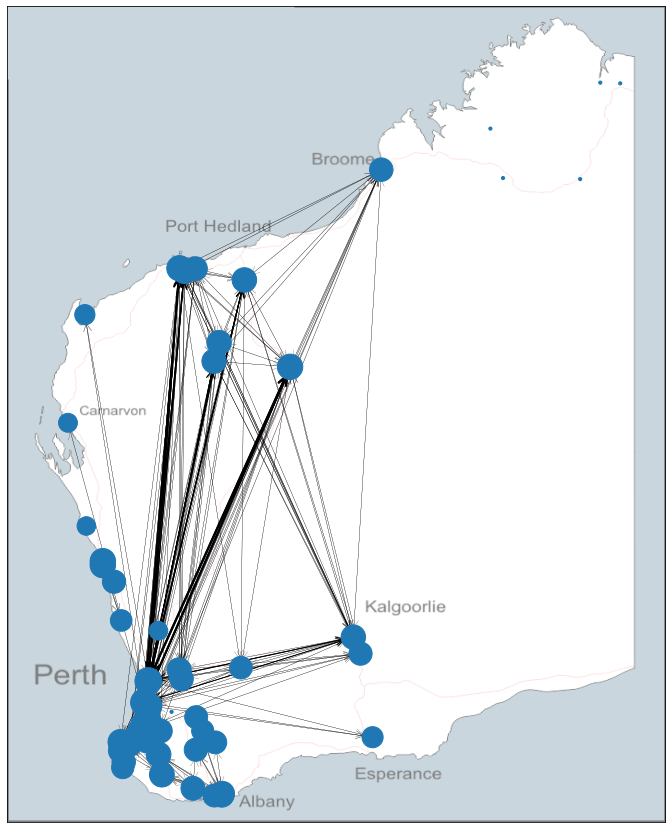

In [25]:
# Finally, plot the figure
plt.figure(figsize = (15,15))
#plt.title("Week of 15/03/20 to 22/03/20", fontsize = 30)
nx.draw_networkx_nodes(A, locs, node_size=ws, label = labeldict)
nx.draw_networkx_edges(A, locs, edgelist=weights.keys(), width=widths, arrows = True, arrowstyle = '->',arrowsize = 20)
#nx.draw_networkx_labels(A, locs, labels = labeldict, font_size = 8)
#plt.savefig('/Volumes/HardDrive/WA_mat_figs/name.png',bbox_inches='tight')
img = mpimg.imread('/Users/Yuval/Desktop/wa.gif')
plt.imshow(img,alpha = 0.5,extent = [112, 130, -35.8, -13.5])
#plt.text(112.5,-15, captionthis(dire[50]), fontsize = 30)
plt.show()